In [8]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal

In [53]:
df = pd.read_csv('orbcomm2-vel.txt')

In [50]:
df_alt1 = pd.read_csv('orbcomm2-alt-sub100.txt')
df_alt2 = pd.read_csv('orbcomm2-alt-sup100.txt')

df_alt = pd.concat([df_alt1, df_alt2], axis=0)
df_alt.drop('t', axis=1, inplace=True)
df_alt.shape

(17531, 2)

In [51]:
df.columns, df_alt.columns

(Index(['n', 't', 'v'], dtype='object'), Index(['n', 'h'], dtype='object'))

In [59]:
df_all = df.set_index('n').join(df_alt.set_index('n'))

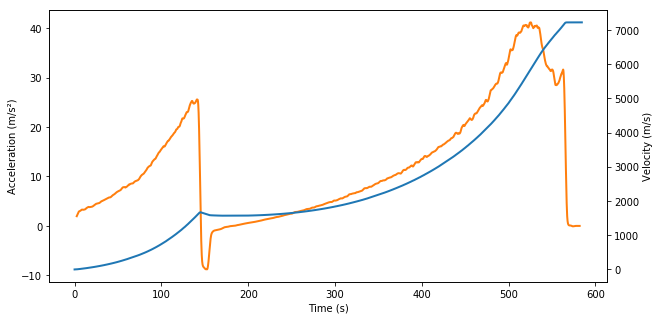

In [68]:
t = df['t']
t = t - t[0]

kph = df['v']
v = kph * 1000 / 3600

a = np.diff(v) * 30 # fps

# differentating is noisy
winsize = 150
window = signal.cosine(winsize)
window = window / window.sum()
a = np.convolve(a, window, mode='valid')

f, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Time (s)')
ax2 = ax.twinx()

ax2.plot(t, v, color='C0', lw=2)
ax2.set_ylabel('Velocity (m/s)')

ax.plot(t[winsize//2:-winsize//2], a, color='C1', lw=2)
ax.set_ylabel('Acceleration (m/s²)')

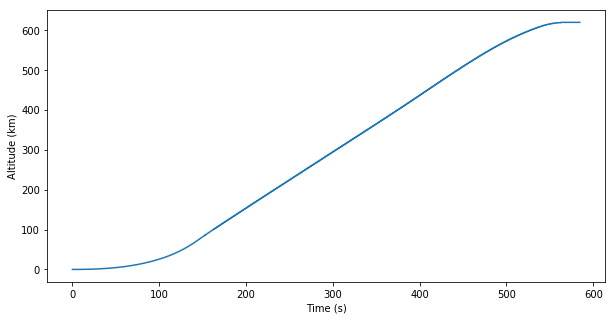

In [71]:
f, ax = plt.subplots(figsize=(10, 5))
ax.plot(t, df_all['h']/10)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Altitude (km)')

In [73]:
df_all.to_csv('orbcomm2-raw.csv')